In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/SC'
!ls "/content/drive/MyDrive/SC"

bahan  latih  validasi


In [ ]:
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [ ]:
cat_dir = os.path.join(bahan_dir, 'cat/')
cow_dir = os.path.join(bahan_dir, 'cow/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar kucing:', len(os.listdir(cat_dir)))
print('Jumlah gambar sapi:', len(os.listdir(cow_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar kucing: 50
Jumlah gambar sapi: 50


In [ ]:

train_cat = os.path.join(train_dir, 'cat/')
train_cow = os.path.join(train_dir, 'cow/')

validation_cat = os.path.join(validation_dir, 'cat/')
validation_cow = os.path.join(validation_dir, 'cow/')

In [ ]:
print('Jumlah all kucing:', len(os.listdir(cat_dir)))
print('Jumlah train kucing', len(os.listdir(train_cat)))
print('Jumlah validation kucing', len(os.listdir(validation_cat)))

print('Jumlah all sapi:', len(os.listdir(cow_dir)))
print('Jumlah train sapi', len(os.listdir(train_cow)))
print('Jumlah validation sapi', len(os.listdir(validation_cow)))

Jumlah all kucing: 50
Jumlah train kucing 45
Jumlah validation kucing 5
Jumlah all sapi: 50
Jumlah train sapi 45
Jumlah validation sapi 5


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


train_datagen = ImageDataGenerator(
   rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_genearator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size= 18,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=18,
    class_mode='categorical'
)


Found 90 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai >99%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(640, 640, 3))
for layer in base_model.layers:
    layer.trainable = False
model = tf.keras.models.Sequential([
    tf.keras.layers.Resizing(640, 640, input_shape=(150, 150, 3)),  # Tambahkan input_shape di sini
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_2 (Resizing)                │ (None, 640, 640, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 638, 638, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 319, 319, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 317, 317, 64)        │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 158, 158, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 156, 156, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 78, 78, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 778752)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      99,680,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,764,226 (380.57 MB)

 Trainable params: 99,764,226 (380.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_genearator,
    steps_per_epoch=6,
    epochs=20,
    validation_data=val_generator,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/20
5/6 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.4285 - loss: 6.6245

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 86s 13s/step - accuracy: 0.4349 - loss: 6.7222 - val_accuracy: 0.8000 - val_loss: 0.5571
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 82s 13s/step - accuracy: 0.6204 - loss: 0.7029 - val_accuracy: 0.8000 - val_loss: 0.5199
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 151s 15s/step - accuracy: 0.6420 - loss: 0.6110 - val_accuracy: 1.0000 - val_loss: 0.2645
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 132s 13s/step - accuracy: 0.6747 - loss: 0.5636 - val_accuracy: 0.5000 - val_loss: 0.6038
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 81s 13s/step - accuracy: 0.6127 - loss: 0.7153 - val_accuracy: 0.7000 - val_loss: 0.5553
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 81s 13s/step - accuracy: 0.6012 - loss: 0.6011 - val_accuracy: 0.8000 - val_loss: 0.4235
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 81s 13s/step - accuracy: 0.7100 - loss: 0.5737 - val_accuracy: 0.8000 - val_loss: 0.5627
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 13s/step - accuracy: 0.5880 - loss: 0.5691 - val_accuracy: 0.7000 - val_loss: 0.5454
Epoch 9/2

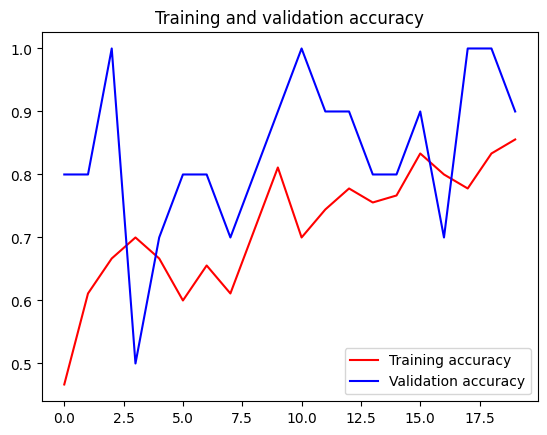

<Figure size 640x480 with 0 Axes>

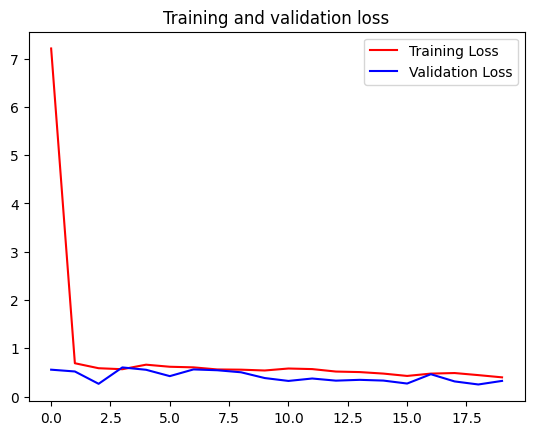

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc= 'best')
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc = 'best')
plt.show()

Saving 0bc9244dbf.jpg to 0bc9244dbf.jpg


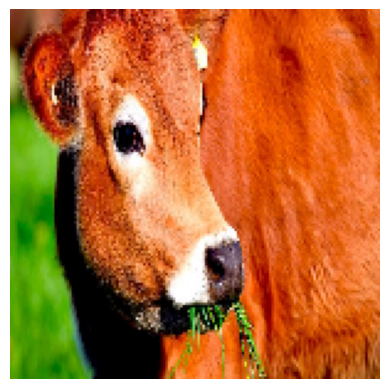

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
This image belongs to class cow


In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
import os
import matplotlib.pyplot as plt

# Unggah file gambar
uploaded = files.upload()

# Daftar kelas dari direktori pelatihan
class_list = os.listdir(train_dir)

for fn in uploaded.keys():
    # Muat gambar dan ubah ukuran
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    plt.axis('off')  # Menyembunyikan sumbu untuk tampilan yang lebih baik
    plt.show()  # Menampilkan gambar

    # Ubah gambar menjadi array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Melakukan prediksi
    classes = model.predict(x, batch_size=10)

    # Mengidentifikasi kelas
    for j in range(len(class_list)):  # Ganti 42 dengan len(class_list)
        if classes[0][j] == 1:
            print('This image belongs to class', class_list[j])
            break